<a href="https://colab.research.google.com/github/decoz/mlclass/blob/master/etc/flask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flask 패키지를 사용해서 간단한 웹 사이트 만들어보기 

웹 서버의 원리는 기본적으로 간단하다. 인터넷 특정 포트(기본은 80번)로 들어오는 연결 요청을 서버가 수락하고 주소 뒤 경로에 대응하여 답변으로 데이터를 전송한다. 이 답변 텍스트를 받은웹브라우저는  http 라고 하는 문서 규약에 맞춰 화면에 뿌려준다. 



## 0.Flask 소개

이 답변 텍스트를 주로 html 파일 형식으로 저장한 후에 그 파일내용을 전달하는 경우가 가장 보편적이지만 반드시 그래야 할 이유는 없다. 

hello window 라는 텍스트를 전송하면 웹 브라우저는 저 글자를 그냥 보여준다. 

복잡한 웹의 요청을 효율적으로 관리하기 위해 html파일을 사용하고 대규모의 html 파일을 효율적 보여주기 위해 스프링같은 프레임워크가 널리 알려져 있을뿐 원리는 간단하며 이런 원리에 입각해 굳이 html 파일이나 db등의 복잡한 형식 없이 print문처럼 웹의 출력을 구현해주는 패키지가 바로 Flask 이다. 

다음의 코드를 보자. 

```

from flask import Flask
app = Flask(__name__)

@app.route("/")
def home():
    return "<h1>Welcome to Flask</h1>"
  
app.run()
```

위의 파이썬 코드를 본인 pc 에서 실행하고 웹 브라우저에 https://127.0.0.1:5000  이라고  연결하면 브라우저에 'Welcome to Flask' 라는 글씨가 \<h1\> 태그에 맞춰 크게 출력 될 것이다.  




## 1. Colab에서 Flask 사용법

하지만 만일 Colab 에서 이를 실행한다면 웹서버는 본인의 컴이 아닌 구글의 가상머신에서 실행되기 때문에 ( Colab 서버와는 또 다른 가상의 컴퓨터 ) 위에처럼은 되지 안는다.  이때 이러한 가상 머신을 기반으로 한 서버에 접속하기 위해서 가상머신망을 밖으로 연결해주기 위한 터널링을 지원해야 하는데 이 패키지 이름이 

<h3> flask-ngrok </h3> 이다.  

colab에는 기본으로 flask는 설치되어 있지만 ngrok 는 빠져있기 때문에 다음 쉘 명령으로 이를 설치해준다. 


In [ ]:
!pip install flask-ngrok



설치가 성공적으로 끝났다면 이제 이를 이용해 colab에서 간단한 웹 서비스를 만들어보자.  이 터널링을 사용하여 flask를 사용할때도 기본적으론 flask와 같다. 다만 

```
from flask_ngrok import run_with_ngrok
...
run_with_ngrok(app)   

```
위의 두 구문을 추가해주면 된다.  나머지는 기본 flask와 같다. 이제 이를 추가한 아래의 코드를 보자. 실행하면 colab 상에서 웹 서버가 터널링을 통해 열리게 된다. 


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
    return "<h1>Greeting on Google Colab!</h1>"
  
app.run()

그런데 가상머신 주소를 어떻게 알고 접속하냐고?  실행을 하면 출력에 

http://b19d198e8bc2.ngrok.io

같은 요상한 링크가 출력될 것이다. 이것이 임시로 할당된 터널링용 url 이다. 이를 통해 일종의 프록시처럼 접속을 가능하게 해준다. (앞에 요상한 코드는 매번 랜덤으로 할당된다. 매번 주소가 바뀌니 이것으로 안정적인 서비스는 어렵지만 개발용 테스트에는 문제가 없다. 정식으로 호스팅 할때는 자기 컴퓨터나 호스팅 서버를 사용하자. ) 

이제 링크를 클릭하면 웹 브라우저가 가상머신의 웹서버에 접속하고 Greeting on Google Colab! 이란 메시지를 출력할 것이다. 



## 2.flask 에서 여러 요청을 처리하기 

실제 서비스에 활용하기 위해서 매번 Greeting 만 출력할 수는 없다. 다양한 기능들을 표현해줘야 하는데 이는 url 의 뒤에 경로로 구분이 가능하다. 

예를 들어 
```
https://{ip}/
```

만 치면 기본 화면이 뜨지만 

```
https://{ip}/abcd 
```

이렇게 접속하면 다른 출력을 보여주게 하려면 어떻게 해야할까? 위의 코드에서

```
@app.route('/')
def hello():
    return "Hello World!"
```

이 부분은 루트경로의 요청에 대한 처리 코드이다. 만일 /abcd 는 다른 방식의 출력을 해주고 싶다면 
```
@app.route('/abcd/')
def process_abcd():
    return "abcdefghijk..."
```
라는 내용을 추가해주면 / 경로와 /abcd 경로의 출력을 다르게 줄 수 있다.  아예 고정경로가 아니라 그 경로값을 파라미터처럼 받을 수도 있는데 

```
@app.route('/<name>')
def hello_name(name):
  .. 

```
라고 치면 /jhon , /marry , /samson  등등의 경로값이 name이라는 파라미로 전달되서 일괄 처리가 된다. 

이를 응용해서 만일 여러 게시판을 관리할때는 

@app.route('/bbs/\<id\>') 이런식으로 게시판 id 값을 url로 받아서 해당 게시판을 출력할 수도 있다.  이번에는 아래 서버를 실행해서 접속해보고 url 뒤에 /아무거나 를 붙여서 접속해보자. 

In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def hello():
    return "Hello World!"

@app.route('/<name>')
def hello_name(name):
    return "Hello {}!".format(name)

if __name__ == '__main__':
    app.run()

<br>

## 3.사용자의 입력을 처리하는 페이지 만들기 

딥러닝등 파이썬으로 작성된코드를 flask를 통해 웹으로 서비스할 수 있다. 일단 간단한 text 입력을 받아서 처리하는 서비스를 생각해보자. 

이를 위한 html 화면은 다음과 같이 구성한다. 

```
main_page = """
  <form action = '{url}/show' name = 'msg' method = "post">
  <input name = 'txt'>
  <input type = "submit"/>
  </form>
"""
```

간단한 입력창을 만들어서 버튼을 누르면 그것을 처리하는 화면이다.  / 로 접속하면 위의 입력폼이 뜨고 입력후 버튼을 누르면 /show 쪽 서비스에 입력된 값을 post 메시지로 던지는 html 코드이다. 



단 이때 첫번째 문제가 생긴다. ngrok 패키지를 사용하기 때문에 url이 서버 실행마다 바뀌어서 위의 {url} 부분이 바뀌어야 한다. (고정url 서버라면 문제가 없다. ) 

<br>

### 3.1 NGROK url 을 얻어서 교체해주기 

다행히 url 을 얻는 함수가 아래에 있다. (웹을 통해 서버자신의 api를 호출해서 url을 얻어오는 코드인듯 하다.) 


In [ ]:
import requests
import json
def get_ngrok_url():
    url = "http://localhost:4040/api/tunnels/"
    res = requests.get(url)
    res_unicode = res.content.decode("utf-8")
    res_json = json.loads(res_unicode)
    for i in res_json["tunnels"]:
        if i['name'] == 'command_line':
            return i['public_url']
            break



위의 함수를 통해 서버 url을 가져오면 위의 html 의 {url} 부분을 다음코드를 통해 실제 url 로 교체시켜 주면 된다. 

```
main_page.replace("{url}", get_ngrok_url() )
```



그리고 form의 값을 전송하는 경우는 특별히 route 에 다음과같이 method 를 추가해줘야 한다. 
```
@app.route('/show/', methods = ['POST'] )
```

이제 메인페이지에서 /show 페이지로 링크되는 서비스를 한번 런칭해보면 버튼클릭시 show 페이지로 링크가 되는 것을 볼 수 있을 것이다. 


In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)

main_page = """
  <form action = '{url}/show' name = 'msg' method = "post">
  <input name = 'txt'>
  <input type = "submit"/>
  </form>
"""

@app.route('/')
def hello():  
    url = get_ngrok_url()    
    return main_page.replace("{url}", url)
    
@app.route('/show/', methods = ['POST'] )
def show_txt():
    return "show!"

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://cccae4789096.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [29/Sep/2020 00:05:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Sep/2020 00:05:56] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [29/Sep/2020 00:05:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Sep/2020 00:06:00] "POST /show HTTP/1.1" 308 -
127.0.0.1 - - [29/Sep/2020 00:06:00] "POST /show/ HTTP/1.1" 200 -


### 3.2 POST 로 전송된 텍스트 추출

이제 사용자가 입력한 txt 메시지를 뽑아내보자. 
```
 <input name = 'txt'>
```
로 입력폼을 만들었으므로 /show 처리 코드에서 다음 구문을 통해 간단하게 txt 값을 추출할 수 있다. 

```
from flask import request
txt = request.form.get('txt')
```


In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)

main_page = """
  <form action = '{url}/show' name = 'msg' method = "post">
  <input name = 'txt'>
  <input type = "submit"/>
  </form>
"""

@app.route('/')
def hello():  
    url = get_ngrok_url()    
    return main_page.replace("{url}", url)
    
@app.route('/show/', methods = ['POST'] )
def show_txt():
  txt = request.form.get('txt')
  return "show! : " + txt

if __name__ == '__main__':
    app.run()

### 3.3 page 를 html파일로부터 열기 

위에서 입력 인터페이스는 4줄짜리 최소한으로 구성되었기 때문에 바로 main_page 라는 문자열로 구성할 수 있었지만 시각적인 효과등이 필요할 경우 이를 문자열로 코드에 넣는 것은 너무나 비효율 적이다. 

이제 
```
main_page = """ 
  <form action ...   
```
위의 form 부분을 form.html 파일로 만들어colab에 업로드 해서 파일로부터 처리하는 코드로 변경한다. 

```
f = open('form.html', mode = 'r')
main_page = f.read() 
```


In [ ]:
from flask import Flask, request
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)


@app.route('/')
def hello():
    f = open('form.html', mode = 'r')
    main_page = f.read() 
    url = get_ngrok_url()    
    return main_page.replace('{url}', url)

@app.route('/show/', methods = ['POST','GET'])
def show_txt():    
    return "got message" + request.form.get('txt')
    
if __name__ == '__main__':
    app.run()


### 3.4 페이지 전환 없이 결과만 가져오기 

파이썬 코드가 데이터를 처리해서 그 결과를 리턴하는 거라면 굳이 그 결과를 출력하는 페이지를 따로 보여줘야 할까? 사실 요즘 대세는 왠만하면 페이지 전환을 하지 안는다. 

대신 실제 페이지 전환 없이 내부적으로 url을 요청해서 결과만 가져오는 방식을 사용한다.  이 부분은 web 과 자바스크립트에 대한 깊이있는 이해가 필요하므로 여기선 생략하고 그 코드만 참조하자. 

```
document.forms[0].onsubmit = async(e) => {
  e.preventDefault();
  const params = new URLSearchParams([...new FormData(e.target).entries()]);
  // fetch("/path/to/server", {method:"POST", body:params})
  const response = await new Response(params).text();
  console.log(response);
  alert(response)
}

```
이 코드에서 document.forms[0] 는 페이지에서 입력폼이 하나인 경우이며 여러 폼이 존재할 경우는 document.getElementByID('{form_id}') 로 하는 것이 더 안전하다. 여튼 위의 코드를 form.html 에 붙이면 버튼을 눌렀을 경우 페이지 전환이 없이 결과만 메시지창에 뜬다. 

이 방식을 사용하면 flask를 사용해 어떤 기능을 구현해 놓아도 form과 url을 통해 간단하게 억세스 할 수 있다. 


## 4.이미지 파일 전송과 재구성 

위의 서비스에서 입력을 텍스트에서 이미지로 바꾸면 다음과 같다.  form 부분에 enctype=multipart/form-data 가 들어가는 점을 유념하자. 

```
<form action = '{url}/img' name = 'msg' method = "post" 
  enctype=multipart/form-data>
  <input type = file name = 'file'>
  <input type = "submit"/>
  </form>
```
이 페이지는 직접 파일열기 대화창을 열어서 파일을 전송하는데 flask에서는 다음과 같은 형태로 전송된 파일을 받을 수 있다. 

```
from PIL import Image

f = request.files['file']
img = Image.open(f)
display(img)

```

이제 이를 합친 코드를 실행해서 이미지를 전송받도록 해보자. 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5aba57907347.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [29/Sep/2020 01:25:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Sep/2020 01:25:45] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [29/Sep/2020 01:25:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Sep/2020 01:25:49] "POST /img HTTP/1.1" 308 -


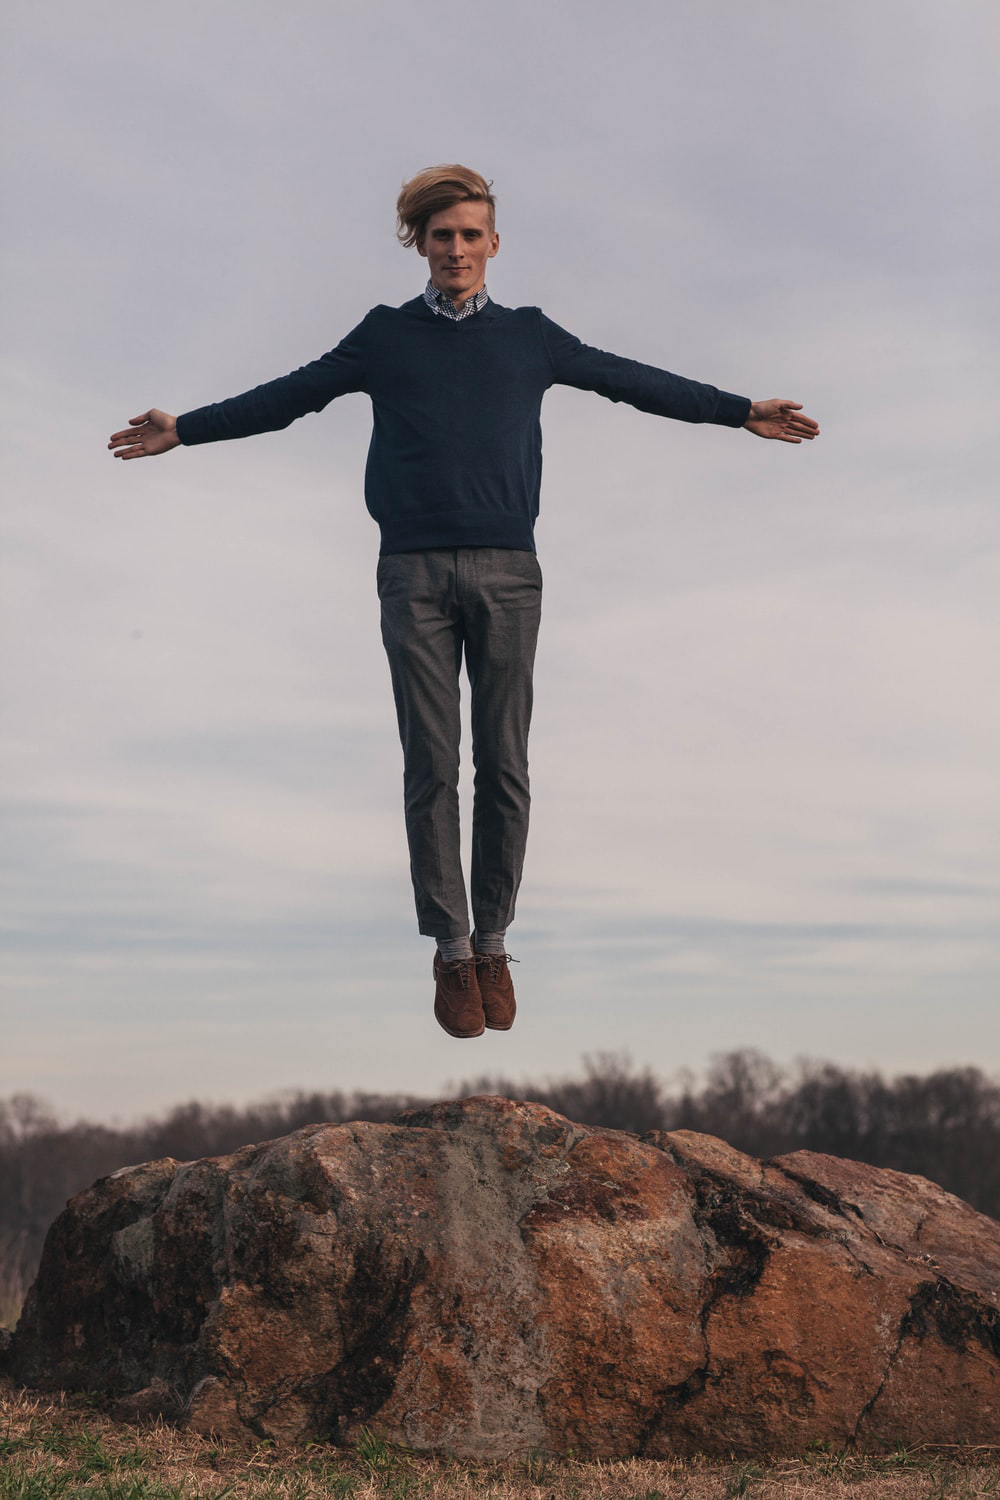

127.0.0.1 - - [29/Sep/2020 01:25:50] "POST /img/ HTTP/1.1" 200 -


In [ ]:
from flask import Flask, request
from flask_ngrok import run_with_ngrok
from PIL import Image
import matplotlib.pyplot as plt 
app = Flask(__name__)
run_with_ngrok(app)

main_page = """
  <form action = '{url}/img' name = 'msg' method = "post" enctype=multipart/form-data >
  <input type = 'file' name = 'file'>
  <input type = "submit"/>
  </form>
"""

@app.route('/')
def hello():  
    url = get_ngrok_url()    
    return main_page.replace("{url}", url)
    
@app.route('/img/', methods = ['POST'] )
def show_txt():  
  f = request.files['file']
  
  img = Image.open(f)
  display(img)

  return "show! img : " + f.filename

if __name__ == '__main__':
    app.run()

만일 불러온 이미지를 numpy array로 바꾸고자 한다면 다음과 같다. 


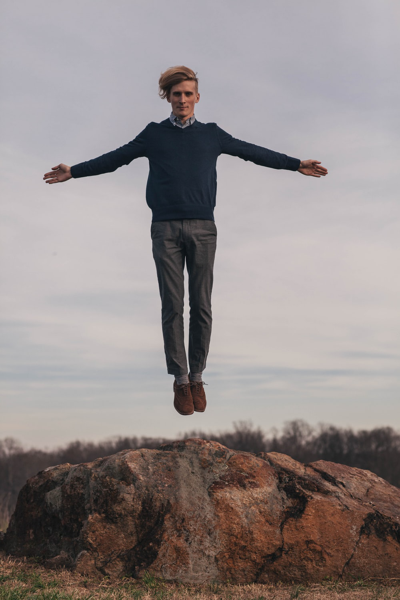

(600, 400, 3)


In [ ]:
import numpy as np 
img = Image.open('t.jpg') # test 용 이미지 
img = img.resize((400,600))
display(img)
data = np.array(img.getdata())
data = data.reshape(600,400,3)
print(data.shape)


## 5.외부에서 플라스크에 접속하기 

플라스크는 사실 범용 웹서버로는 부족한 점이 많다.  웹 서비스는 대부분 여러 이미지나 스타일, 스크립트 파일들을 서로 링크하여 구성되는 경우가 많은데 플라스크로 이러한 링크를 일일이 서비스 하도록 프로그램 하는 것은 낭비가 심하다. 

그래서 주로 웹에서 파이썬 코드가 필요한 특정 기능부분만 플라스크로 작성하고 이를 일반 웹서버에서 링크해서 서로 협업을 하는 소위 RESTful api 의 작성에 주로 사용된다. 그래서 아파치나 최근 각광받고 있는 nginx 등의 일반 웹서버로 인터페이스 페이지를 구성하고 이를 플라스크에 연결하곤 하는데 막상 연결해보면 에러가 발생한다. 






### 5.1 CORS 

이는 교차 출처 리소스 공유 CORS 라는 것때문에 발생하는 문제로서 보안을 위해 특정 페이지를 외부에서 링크할때 허용가능한지를 설정할 수 있게 한 것인데 이를 설정하지 안으면 동일 ip + 포트 가 아닌 다른 웹서버로부터의 통신을 거부하게 되어있다.  

이를 설정하기 위해서는 먼저 다음과 같은 라이브러리가 필요하다. 

In [ ]:
 !pip install flask_cors 

### 5.2 플라스크 cors 를 사용하여 크로스 사이트 구성하기 

다음 코드는 위의 이미지 서비스를 flask_cors 를 사용하여 외부 접속이 가능하도록 업그레이드 한 것이다.  단 매번 url 이 바뀌는 colab 상에서 다른 웹서버와의 연동은 사실상 힘들다.  그러므로 아래의 코드를 실행할 때는 외부 웹서버를 따로 설치하고 로컬에서 직접 실행하거나 jupyter notebook 이나 jupyter lab 과 같이 사용하는 것을 권한다. 



In [ ]:
from flask import Flask, request
from flask_cors import CORS
app = Flask(__name__)
cors = CORS(app, resources={r"*": {"origins": "*"}})
    
@app.route('/img/', methods = ['POST','OPTIONS'] )
def show_txt():  
  http_method = request.method
  if http_method == "OPTIONS": 
    my_res = Response()
    #print("--사전 요청(Preflight Request)--")
    my_res.headers.add("Access-Control-Allow-Origin", "*")
    my_res.headers.add('Access-Control-Allow-Headers', "*")
    my_res.headers.add('Access-Control-Allow-Methods', "POST")
    return my_res

  if http_method == "POST":     
    f = request.files['file']    
    img = Image.open(f)
    display(img)
    return "show! img : " + f.filename

if __name__ == '__main__':
    app.run()

먼저 method 에 'OPTIONS' 가 추가된 것에 주의하자. 
```
@app.route('/img/', methods = ['POST','OPTIONS'] )
```

이는 외부 서버를 통해 연결시 발생하는 CORS 통신이 'OPTIONS' 메소드로 전송되기 때문에 사용된다.  
이제 /img/ 접속시 OPTIONS와 POST 를 나눠서 처리하게 되는데 OPTIONS 로 접속시에는 CORS 허가 메시지를 전송함으로서 정상적인 외부 요청이 진행되도록 한다. 

```
 http_method = request.method
  if http_method == "OPTIONS": 
    my_res = Response()
    #print("--사전 요청(Preflight Request)--")
    my_res.headers.add("Access-Control-Allow-Origin", "*")
    my_res.headers.add('Access-Control-Allow-Headers', "*")
    my_res.headers.add('Access-Control-Allow-Methods', "POST")
    return my_res
```
위의 코드를 유심히 보면 알겠지만 특정 서버, haeader 등의 정보로 필터링이 가능하지만 여기서는 생략하고 모든 POST 외부접속을 허용하도록 하였다. 



